**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

**IMAGES STORING**

In [ ]:
images = []
for i in range(0,16):
  images.append(cv2.imread(f'8_{i+1}.jpg'))

**TESTING**

(-0.5, 47.5, 47.5, -0.5)

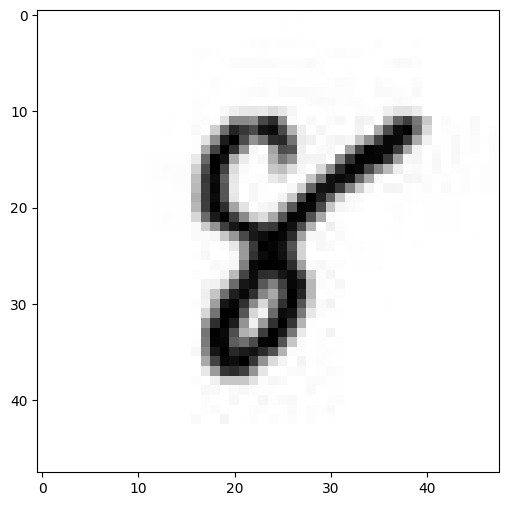

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(images[0])
plt.axis('on')

**CONVERTING TO GRAY SCALE**

In [ ]:
img_gray=[]
for i in range(0,16):
  if len(images[i].shape) == 3 and images[i].shape[2] == 3:
        img_gray.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY))
  else:
        img_gray.append(images[i])

**TESTING - GRAY SCALE**

(-0.5, 47.5, 47.5, -0.5)

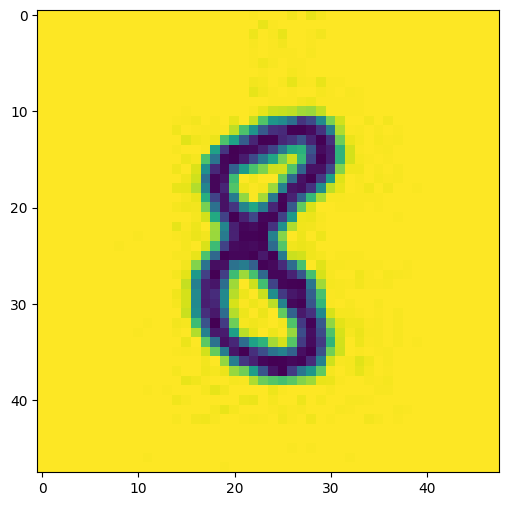

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(img_gray[4])
plt.axis('on')

**EXTRACTING ROW & COLUMN NUMS FOR FLATENING VALUES**

In [ ]:
row=[]
for m in range(0,48):
  for n in range(0,48):
    row.append(m)

In [ ]:
column=[]
for m in range(0,48):
  for n in range(0,48):
    column.append(n)

**EXTRACTING PIXEL VALUES FROM EACH IMG-GRAY IMAGE**

In [ ]:
pixels_img=[]
for i in range(0,16):
  pixels=[]
  for m in range(0,48):
    for n in range(0,48):
      img = img_gray[i]
      pixels.append(img[m][n])
  pixels_img.append(pixels)

In [ ]:
len(pixels_img[0])*16

36864

**DATA-FRAME CREATION**

In [ ]:
data = pd.DataFrame({'Row': row,'Column': column})

In [ ]:
data

,Row,Column
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
2299,47,43
2300,47,44
2301,47,45
2302,47,46


**APPENDING FLATTEN PIXEL VALUES OF EACH IMAGE INTO THE DATA-FRAME**

In [ ]:
for i in range(0,16):
  df = pd.DataFrame({f'pixel[{i+1}]':pixels_img[i]})
  data = pd.concat([data,df],axis=1)

In [ ]:
data.head()

,Row,Column,pixel[1],pixel[2],pixel[3],pixel[4],pixel[5],pixel[6],pixel[7],pixel[8],pixel[9],pixel[10],pixel[11],pixel[12],pixel[13],pixel[14],pixel[15],pixel[16]
0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
1,0,1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,0,2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,0,3,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,0,4,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [ ]:
data.to_csv('output.csv')

**EXTRACTING MEAN PIXEL VALUES INTO ARRAY**

In [ ]:
pixel_mean=[]
for i in range(0,data.shape[0]):
  sum = 0
  for j in range(0,len(pixels_img)):
    sum = sum + pixels_img[j][i]
  pixel_mean.append((sum/16))


In [ ]:
len(pixel_mean)

2304

In [ ]:
data_mean = pd.DataFrame({'pixel_mean':pixel_mean})

In [ ]:
data = pd.concat([data,data_mean],axis=1)

In [ ]:
data.head()

,Row,Column,pixel[1],pixel[2],pixel[3],pixel[4],pixel[5],pixel[6],pixel[7],pixel[8],pixel[9],pixel[10],pixel[11],pixel[12],pixel[13],pixel[14],pixel[15],pixel[16],pixel_mean,pixel_mean
0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255.0
1,0,1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255.0
2,0,2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255.0
3,0,3,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255.0
4,0,4,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255.0


In [ ]:
data.to_csv('8_digit_48x48_16imgs.csv')

**GENERATION OF IMAGE**

In [ ]:
img4 = np.array(pixel_mean).reshape(48,48)

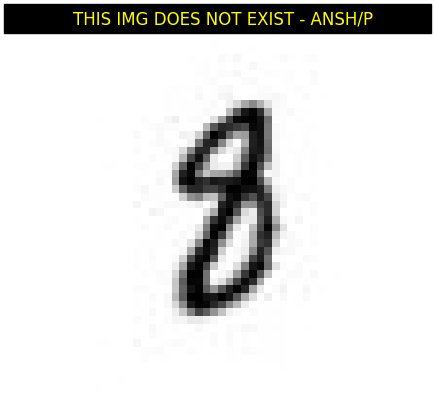

In [ ]:
plt.imshow(img, cmap='gray')
plt.axis('off')
title = plt.title('            THIS IMG DOES NOT EXIST - ANSH/P          ',color='yellow')
title.set_bbox({'facecolor': 'black', 'alpha': 1})
plt.show()